CV2: Imported to use OpenCV for image processing
easygui: Imported to open a file box. It allows us to select any file from our system.\
Numpy: Images are stored and processed as numbers. These are taken as arrays. We use NumPy to deal with arrays.\
Imageio: Used to read the file which is chosen by file box using a path.\
Matplotlib: This library is used for visualization and plotting. Thus, it is imported to form the plot of images.\
OS: For OS interaction. Here, to read the path and save images to that path.

In [ ]:
import cv2 #for image processing
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

The above code opens the file box, i.e the pop-up box to choose the file from the device, which opens every time you run the code. fileopenbox() is the method in easyGUI module which returns the path of the chosen file as a string.

In [ ]:
def cartoonify(ImagePath):
#read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    print(originalmage)  # image is stored in form of numbers
    plt.imshow(originalmage)

# confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
    return originalmage
#plt.imshow(ReSized1, cmap='gray')

[[[241 216 150]
  [240 215 149]
  [239 214 150]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 253]]

 [[239 214 148]
  [239 214 148]
  [238 213 149]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 253]]

 [[238 213 147]
  [237 212 146]
  [237 212 148]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[195 178 148]
  [221 204 174]
  [224 207 177]
  ...
  [202 185 155]
  [190 173 143]
  [190 171 141]]

 [[192 175 145]
  [224 207 177]
  [229 212 182]
  ...
  [195 178 148]
  [181 164 134]
  [184 165 135]]

 [[255 243 213]
  [241 224 194]
  [208 191 161]
  ...
  [190 173 143]
  [169 152 122]
  [206 187 157]]]


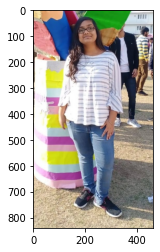

In [ ]:
originalmage = cartoonify("/content/drive/MyDrive/Image Cartoonifier/original.jpg")

In [ ]:
ReSized1 = cv2.resize(originalmage, (960, 540))

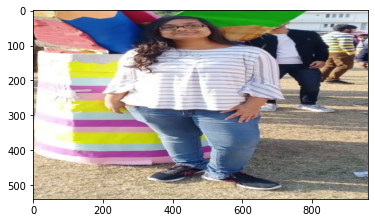

In [ ]:
plt.imshow(ReSized1)

Imread is a method in cv2 which is used to store images in the form of numbers. This helps us to perform operations according to our needs. The image is read as a numpy array, in which cell values depict R, G, and B values of a pixel.

#Transforming an image to grayscale

In [ ]:
#converting an image to grayscale
grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (960, 540))
#plt.imshow(ReSized2, cmap='gray')

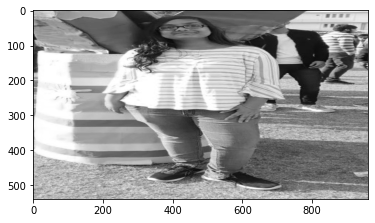

In [ ]:
plt.imshow(ReSized2, cmap='gray')

cvtColor(image, flag) is a method in cv2 which is used to transform an image into the colour-space mentioned as ‘flag’. Here, our first step is to convert the image into grayscale. Thus, we use the BGR2GRAY flag. This returns the image in grayscale. A grayscale image is stored as grayScaleImage.

After each transformation, we resize the resultant image using the resize() method in cv2 and display it using imshow() method. This is done to get more clear insights into every single transformation step.

#Smoothening a grayscale image

In [ ]:
#applying median blur to smoothen an image
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
#plt.imshow(ReSized3, cmap='gray')

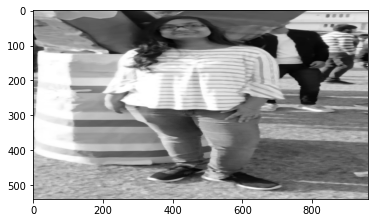

In [ ]:
plt.imshow(ReSized3, cmap='gray')

To smoothen an image, we simply apply a blur effect. This is done using medianBlur() function. Here, the center pixel is assigned a mean value of all the pixels which fall under the kernel. In turn, creating a blur effect.

#Retrieving the edges of an image

In [ ]:
#retrieving the edges for cartoon effect
#by using thresholding technique
getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
  cv2.ADAPTIVE_THRESH_MEAN_C, 
  cv2.THRESH_BINARY, 9, 9)

ReSized4 = cv2.resize(getEdge, (960, 540))
#plt.imshow(ReSized4, cmap='gray')

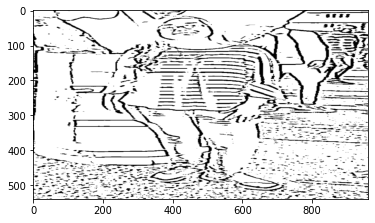

In [ ]:
plt.imshow(ReSized4, cmap='gray')

Cartoon effect has two specialties:

Highlighted Edges\
Smooth colors\
In this step, we will work on the first specialty. Here, we will try to retrieve the edges and highlight them. This is attained by the adaptive thresholding technique. The threshold value is the mean of the neighborhood pixel values area minus the constant C. C is a constant that is subtracted from the mean or weighted sum of the neighborhood pixels. Thresh_binary is the type of threshold applied, and the remaining parameters determine the block size.

#Preparing a Mask Image

In [ ]:
#applying bilateral filter to remove noise 
#and keep edge sharp as required
colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
ReSized5 = cv2.resize(colorImage, (960, 540))
#plt.imshow(ReSized5, cmap='gray')

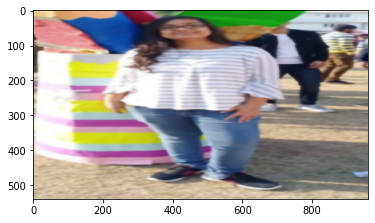

In [ ]:
plt.imshow(ReSized5, cmap='gray')

In the above code, we finally work on the second specialty. We prepare a lightened color image that we mask with edges at the end to produce a cartoon image. We use bilateralFilter which removes the noise. It can be taken as smoothening of an image to an extent.

The third parameter is the diameter of the pixel neighborhood, i.e, the number of pixels around a certain pixel which will determine its value. The fourth and Fifth parameter defines signmaColor and sigmaSpace. These parameters are used to give a sigma effect, i.e make an image look vicious and like water paint, removing the roughness in colors.

Yes, it’s similar to BEAUTIFY or AI effect in cameras of modern mobile phones.

#Giving a Cartoon Effect

In [ ]:
#masking edged image with our "BEAUTIFY" image
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

ReSized6 = cv2.resize(cartoonImage, (420, 850))
#plt.imshow(ReSized6, cmap='gray')

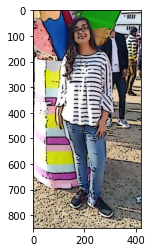

In [ ]:
plt.imshow(ReSized6, cmap='gray')

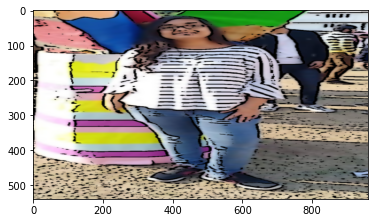

In [ ]:
ReSized7 = cv2.resize(ReSized6, (960, 540))
plt.imshow(ReSized7, cmap='gray')

So, let’s combine the two specialties. This will be done using MASKING. We perform bitwise and on two images to mask them. Remember, images are just numbers?

Yes, so that’s how we mask edged image on our “BEAUTIFY” image.

This finally CARTOONIFY our image!